### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 3
### Due: Saturday, Feb 10th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

In [2]:
# 1 Solution
data_path = '/Users/sofimar/Desktop/Astrostats/hw3_data_1.npy'
data = np.load(data_path, allow_pickle=True)
x = data[:,0] # 1st column measurements
uncrt = data[:,1] # 2nd column uncertainties

hw3_data_1.npy is a (100 x 2) numpy array instead of a (50 x 2) array:

In [3]:
np.shape(data)

(100, 2)

In [4]:
mu = np.sum(x/(uncrt**2))/np.sum(1/(uncrt**2))
sigma = np.sum(1/(uncrt**2))**(-1/2)

print('Sample Mean: ', mu)
print('Uncertainty: ', sigma)

Sample Mean:  3.9179920346060557
Uncertainty:  0.09481084100510954


2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

In [5]:
def sq_loss(m,b,x_=uncrt,x=x):
    x_fit = m * x_ + b
    return np.sum(((x - x_fit) / x_) ** 2, -1)


In [6]:
from scipy import optimize

In [7]:
def L(x, mu, sigma):
    Li = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/(2*sigma**2))
    lnLi = np.log(Li)
    L = np.prod(Li)
    lnL = -np.sum(np.log(Li))
    return lnL

In [9]:
xx_ = np.linspace(-1,9,100)

In [10]:
test = L(x=x, mu=3, sigma=uncrt)

In [12]:
print('Log-likelihood at mu = 3: ', test)

Log-likelihood at mu = 3:  194.13184308038262


In [50]:
f_squared = lambda beta: L(x=x, sigma=uncrt, mu=beta)


beta0 = 4 # initial guess for m
beta_squared = optimize.fmin(f_squared, beta0)

Optimization terminated successfully.
         Current function value: 147.257863
         Iterations: 12
         Function evaluations: 24


In [51]:
print('Optimized mu: ', beta_squared)

Optimized mu:  [3.91796875]


SRT: That works! Great!

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

In [39]:
step3 = np.empty(len(xx_))

for i in range(len(xx_)):
    ln_L = L(x=x, mu=xx_[i], sigma=uncrt)
    step3[i] = ln_L

In [52]:
sig_mu = np.diff(step3, n=2)[0]
sig_mu /= (xx_[1]-xx_[0])**2
sig_mu = 1/np.sqrt(sig_mu)

print("Fisher matrix error on estimated mean is %.3f" % sig_mu)

Fisher matrix error on estimated mean is 0.095


SRT: Well done!

Yay!

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

**Ok I THINK I understand how bootstrapping works, but just in case I don't know what I'm talking about and end up using Sofi's Law for this problem because I can't tell the difference between this step and step 5, I'm gonna lay out my thinking process:**

- Ok so first of all, I am going to assume that this step is only asking for the bootstrap code, but doesn't require any results and the next step is when I actually get to show my results with a nice histogram. So they're kind of one step split into two.

- So I'm going to draw N=100 measurements (and their corresponding uncertanties) from the original data randomly and append their values to a list/array (whatever feels right in the moment)

- Then, I will repeat this B=1,000 times

- In the end, the shape of the measurement list/array should be (1,000, 100) for 1,000 samples of length 100 and the shape of the uncertainty list/array should also be (1,000, 100) for 1,000 sets of 100 uncertainties

In [34]:
# 4 Solution
import random

x_boot = np.empty(shape=(1000,100))
sig_boot = np.empty(shape=(1000,100))


for i in range(1000):
    for j in range(100):
        x_boot[i,j] = random.choice(x)
        uncrt_index = np.where(x==x_boot[i,j])
        sig_boot[i,j] = uncrt[uncrt_index]


/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_50193/2388214924.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sig_boot[i,j] = uncrt[uncrt_index]


SRT: This is all correct, Sofi! Nicely done. A key thing here (which I believe you did) is keeping the data and uncertainties paired together when random choices are selected.

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

In [53]:
# 5 Solution

boot_mu = np.empty(1000)

for i in range(1000):
    f_squared2 = lambda beta: L(x=x_boot[i], sigma=sig_boot[i], mu=beta)
    bootmean = optimize.fmin(f_squared2, 3)
    boot_mu[i] = bootmean

Optimization terminated successfully.
         Current function value: 150.797206
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 139.570301
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 151.605318
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 144.919500
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 142.801603
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 155.324354
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 144.260467
         Iterations: 16
         Function evaluations: 32
Optimization termina

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_50193/3713025399.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  boot_mu[i] = bootmean


Optimization terminated successfully.
         Current function value: 153.251189
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 149.614216
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 154.061262
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 148.194117
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 131.482389
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 146.185005
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 153.283660
         Iterations: 16
         Function evaluations: 32
Optimization termina

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

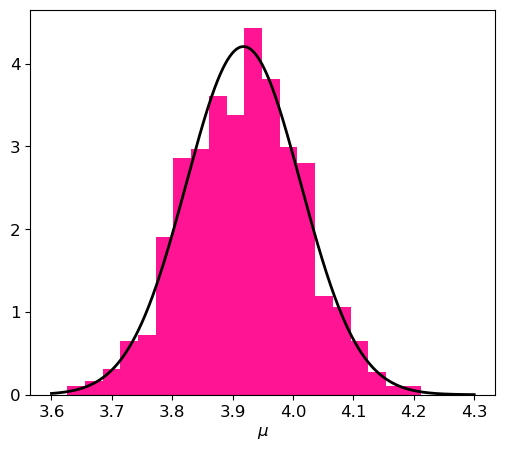

In [74]:
xgrid = np.linspace(3.6, 4.3, 1000)

gauss = stats.norm.pdf(x=xgrid, loc=mu, scale=sigma)

plt.figure(figsize=(6,5))
plt.hist(boot_mu, color='deeppink', density=True, bins=20)
plt.plot(xgrid, gauss, color='black', linewidth=2)
plt.xlabel('$\mu$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

SRT: Excellent!

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

In [76]:
# 6 Solution
def lnLaplace(x, mu, sigma):
    delta = sigma/np.sqrt(2)
    Li = 1/(2*delta)*np.exp((-np.abs(x-mu))/delta)
    lnL = -np.sum(np.log(Li))
    return lnL

In [80]:
# Fit Mean
lnL_lap_mu = lambda beta: lnLaplace(x=x, sigma=uncrt, mu=beta)
mu_fit = optimize.fmin(lnL_lap_mu, 4)

lnL_lap_sig = lambda beta: lnLaplace(x=x, sigma=beta, mu=xx_)
sig_fit = optimize.fmin(lnL_lap_sig, 0.5)
delta_fit = sig_fit/np.sqrt(2)

print('Optimized mu: ', mu_fit)
print('Optimized Delta: ', delta_fit)

Optimization terminated successfully.
         Current function value: 153.894192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 267.305426
         Iterations: 21
         Function evaluations: 42
Optimized mu:  [4.04296875]
Optimized Delta:  [2.66421815]


SRT: A few problems here. Now in the Laplace likelihood the data should feature, but the uncertainties do not. So `sigma` uncertainties should not be passed in. `Delta` is just another parameter. Since the Laplace likelihood has 2 parameters to estimate, they should be fit simultaneously in `optimize`. Your fitted mean gets close, but try the code cell below. -4 points

In [ ]:
def lnlaplace(mu, delta, x):
    return np.sum(scipy.stats.laplace.logpdf(x, loc=mu, 
                                             scale=delta))

f_lnlaplace = lambda beta: -lnlaplace(beta[0], beta[1], x)

# compute the maximum likelihood 
beta0 = (1.0, 0.5) # initial guess for a and b
beta_laplace = optimize.fmin(f_lnlaplace, beta0)
print(beta_laplace)

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

In [81]:
# 7 Solution
def AIC(best_lnL, k=2, N=100):
    aic = -2*best_lnL+(2*k)+((2*k*(k+1))/(N-k-1))
    return aic

In [82]:
gauss_lnL = L(x=x, mu=beta_squared, sigma=uncrt)
lap_lnL = lnLaplace(x=x, mu=mu_fit, sigma=uncrt)

gauss_aic = AIC(gauss_lnL)
lap_aic = AIC(lap_lnL)

print('Gaussian AIC = ', gauss_aic)
print('Laplace AIC = ', lap_aic)

Gaussian AIC =  -290.3920144947258
Laplace AIC =  -303.6646734360915


### Laplacian model is favored by the data since the AIC value for the Laplacian model is less than that of the Gaussian model

SRT: The Gaussian should be favored, but this is error carried forward on a correct AIC procedure. No points deducted.

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

In [83]:
# 8 Solution
x_boot2 = np.empty(shape=(1000,100))
sig_boot2 = np.empty(shape=(1000,100))


for i in range(1000):
    for j in range(100):
        x_boot2[i,j] = random.choice(x)
        uncrt_index2 = np.where(x==x_boot2[i,j])
        sig_boot2[i,j] = uncrt[uncrt_index2]



boot_mu2 = np.empty(1000)
boot_delta = np.empty(1000)

for i in range(1000):
    f_squared3 = lambda beta: lnLaplace(x=x_boot2[i], sigma=sig_boot2[i], mu=beta)
    bootmean2 = optimize.fmin(f_squared3, 3)
    boot_mu2[i] = bootmean2

    f_squared4 = lambda beta: lnLaplace(x=x_boot2[i], sigma=beta, mu=xx_)
    bootsig = optimize.fmin(f_squared4, 0.5)
    boot_delta[i] = bootsig/np.sqrt(2)


/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_50193/1554646696.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sig_boot2[i,j] = uncrt[uncrt_index2]


Optimization terminated successfully.
         Current function value: 165.037494
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 266.610831
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 148.503823
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 261.680744
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 153.733237
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 270.991091
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 148.009678
         Iterations: 18
         Function evaluations: 36
Optimization termina

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_50193/1554646696.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  boot_mu2[i] = bootmean2
/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_50193/1554646696.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  boot_delta[i] = bootsig/np.sqrt(2)


Optimization terminated successfully.
         Current function value: 144.814178
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 259.327111
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 164.356862
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 265.107322
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 148.557571
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 268.094745
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 159.165573
         Iterations: 16
         Function evaluations: 32
Optimization termina

In [84]:
import corner

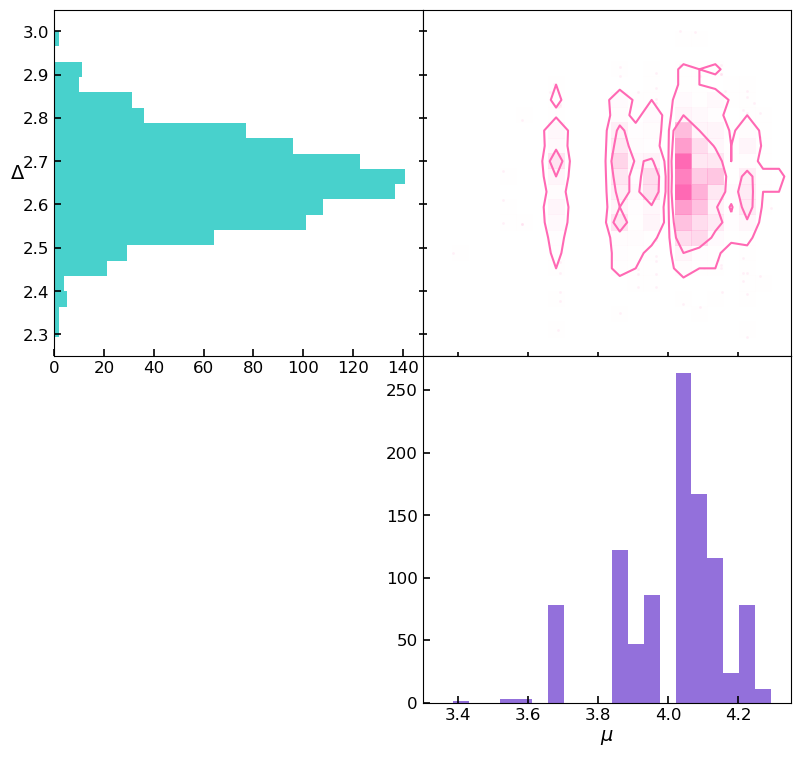

In [121]:
fig = plt.figure(figsize=(9.5,9))

fig.add_subplot(2,2,1)
plt.hist(boot_delta, orientation='horizontal', bins=20, color='mediumturquoise')
plt.ylim(2.25, 3.05)
plt.tick_params('y', direction='in', length=5, width=1.2)
plt.tick_params('x', direction='in', length=5, width=1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('$\Delta$', fontsize=14, rotation='horizontal')


fig.add_subplot(2,2,2)
corner.hist2d(boot_mu2, boot_delta, levels=[0.68, 0.95], color='hotpink')
plt.ylim(2.25, 3.05)
plt.xlim(3.3, 4.35)
plt.tick_params('y', direction='inout', length=6, width=1.2)
plt.tick_params('x', direction='inout', length=6, width=1.2)
plt.xticks(fontsize=12, ticks=[3.4, 3.6, 3.8, 4.0, 4.2], 
           labels=['', '', '', '', ''])
plt.yticks(fontsize=12, ticks=[2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0],
           labels=['', '', '', '', '', '', '', ''])


fig.add_subplot(2,2,4)
plt.hist(boot_mu2, bins=20, color='mediumpurple')
plt.xlim(3.3, 4.35)
plt.tick_params('y', direction='in', length=5, width=1.2)
plt.tick_params('x', direction='in', length=5, width=1.2)
plt.xticks(fontsize=12, ticks=[3.4, 3.6, 3.8, 4.0, 4.2], 
           )
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)


fig.subplots_adjust(hspace=0, wspace=0)

SRT: Solid effort, and again error carried through. I particularly like the manual hacking of `corner`! You can do the following as well.

In [ ]:
corner.corner(np.column_stack([lapmu_boot,lapdelta_boot]), 
              levels=[0.68,0.95], labels=['$\mu$', '$\Delta$'], 
              show_titles=True, smooth=True, smooth1d=True);

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [1]:
!pip install numdifftools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [122]:
import numdifftools as nd

In [130]:
f_lap= lambda beta,theta: lnLaplace(x=x, mu=beta, sigma=theta)

H = nd.Hessian(f_lap)(mu_fit, sig_fit)
sigma_laplace = np.linalg.inv(H)**0.5

In [131]:
H

array([[27.71069511]])

In [132]:
sigma_laplace

array([[0.18996618]])

SRT: Again, good effort. But there is only one uncertainty computed here, and there should be two. One for each parameter. And there should be discussion of comparison to the bootstrapping distribution. -3 points.

In [ ]:
import numdifftools as nd
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5
print(sigma_laplace)